In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Q1. Write a function that simulates this game for 𝑁 rounds, where each round consists of betting 1 dollar on black. The function should return your total earnings 𝑆n after N rounds

In [67]:
def roulette_simulation(N):
    total_earnings = 0
    for _ in range(N):
        spin = random.randint(0, 37) 
        if 1 <= spin <= 18: 
            total_earnings += 1
        else:  
            total_earnings -= 1
    return total_earnings


In [68]:
N = 1000
total_earnings = roulette_simulation(N)
print(f"Total earnings after {N} rounds: {total_earnings} dollars")

Total earnings after 1000 rounds: -62 dollars


probability distributon of random variable X:

X = +1 with probability 18/38 (winning by landing on black).

X = −1 with probability 20/38 (losing by landing on red or green).

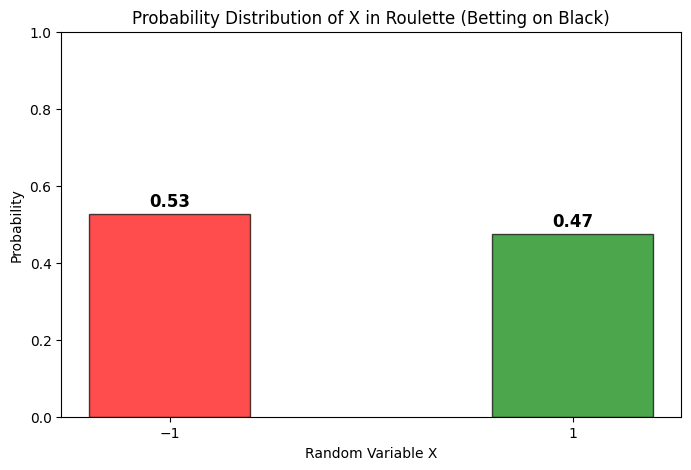

In [69]:
import matplotlib.pyplot as plt

X_values = [1, -1]  # +1 for winning, -1 for losing
probabilities = [18/38, 20/38]  # Probabilities for winning and losing

plt.figure(figsize=(8, 5))
plt.bar(X_values, probabilities, color=['green', 'red'], alpha=0.7, edgecolor='black')

plt.xlabel("Random Variable X")
plt.ylabel("Probability")
plt.title("Probability Distribution of X in Roulette (Betting on Black)")
plt.xticks(X_values)

for i, prob in enumerate(probabilities):
    plt.text(X_values[i], prob + 0.02, f"{prob:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.ylim(0, 1)
plt.show()


calculating the population mean and population std (theoretical):

In [70]:
import numpy as np

X_values = np.array([1, -1])  
probabilities = np.array([18/38, 20/38]) 

# Compute the expected value E(X)
population_mean = np.sum(X_values * probabilities)

# Compute E(X^2)
expected_X2 = np.sum(X_values**2 * probabilities)

# Compute variance Var(X) = E(X^2) - [E(X)]^2
variance = expected_X2 - population_mean**2

population_std = np.sqrt(variance)

print(f"Theoretical Mean (E[X]): {population_mean:.4f}")
print(f"Theoretical Variance (Var[X]): {variance:.4f}")
print(f"Theoretical Standard Deviation (σ[X]): {population_std:.4f}")


Theoretical Mean (E[X]): -0.0526
Theoretical Variance (Var[X]): 0.9972
Theoretical Standard Deviation (σ[X]): 0.9986


In [71]:
def monte_carlo_simulation_earnigs(N, simulations):
    earnings = []
    for _ in range(simulations):
        earn = roulette_simulation(N) 
        earnings.append(earn)

    return np.array(earnings)

### Q2. Use Monte Carlo simulation to study the distribution of total earnings 𝑆n for N = 10, 25, 100, 1000. For each 𝑁, simulate 100,000 rounds and plot the distribution of total earnings. Analyze whether the distributions appear similar to a normal distribution.


N = 10: simulation expected value = -0.52438, simulation standard error = 3.157344709657151
N = 25: simulation expected value = -1.32374, simulation standard error = 4.997474603477241
N = 100: simulation expected value = -5.2458, simulation standard error = 9.990478585132946
N = 1000: simulation expected value = -52.4782, simulation standard error = 31.63341974494696


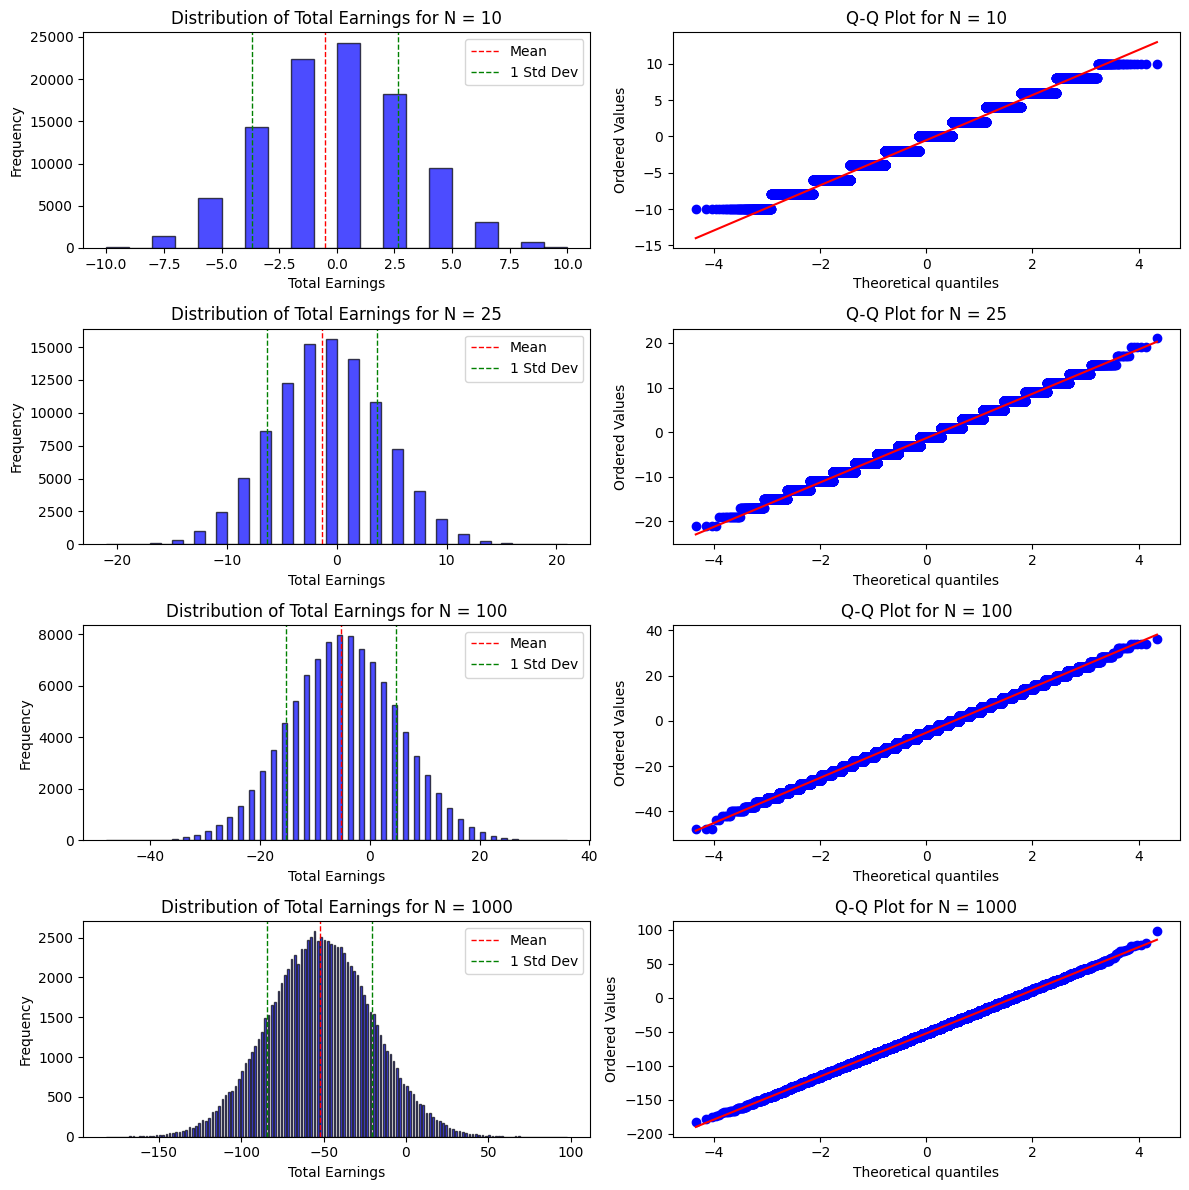

In [72]:
N_values = [10, 25, 100, 1000]
simulations = 100000

simulation_expected_values = {}
simulation_standard_errors = {}

plt.figure(figsize=(12, 12))

for i, N in enumerate(N_values):
    earnings = monte_carlo_simulation_earnigs(N, simulations)
    
    mean = np.mean(earnings)
    std_dev = np.std(earnings)
    min_val = np.min(earnings)
    max_val = np.max(earnings)

    simulation_expected_values[N] = mean
    simulation_standard_errors[N] = std_dev

    print(f"N = {N}: simulation expected value = {mean}, simulation standard error = {std_dev}")

    plt.subplot(4, 2, 2 * i + 1)
    bin_width = 1
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    plt.hist(earnings, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Total Earnings for N = {N}')
    plt.xlabel('Total Earnings')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='1 Std Dev')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
    plt.legend()
    
    plt.subplot(4, 2, 2 * i + 2)
    stats.probplot(earnings, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for N = {N}')

plt.tight_layout()
plt.show()


#### observe how the expected values and standard errors change with N.

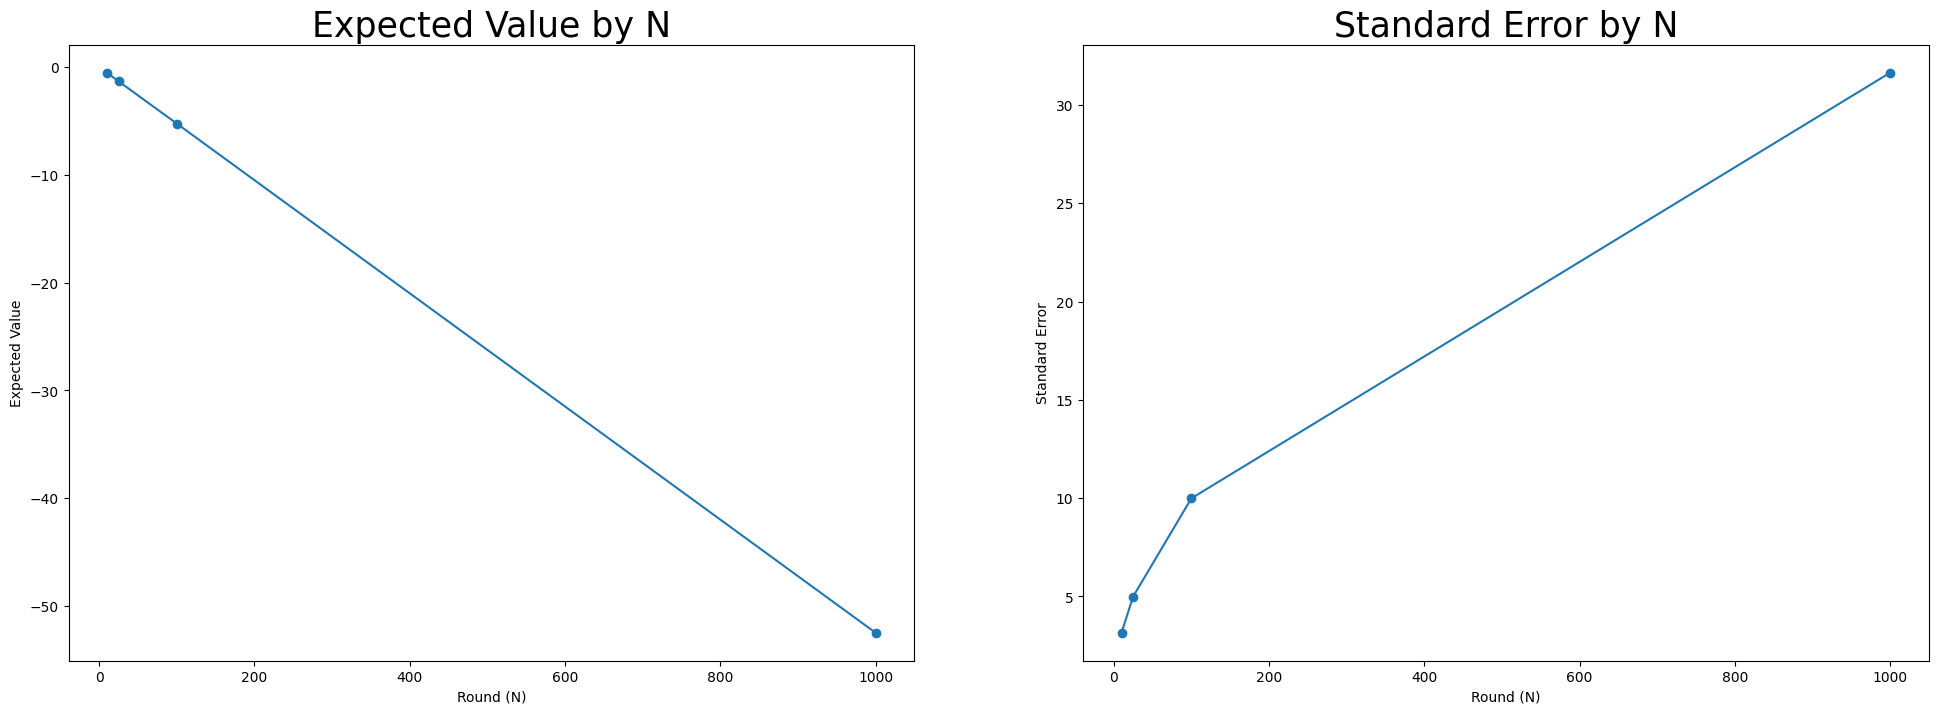

In [73]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(list(simulation_expected_values.keys()), list(simulation_expected_values.values()), linestyle='-', marker='o')

plt.title('Expected Value by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Expected Value')

plt.subplot(1, 2, 2)
plt.plot(list(simulation_standard_errors.keys()), list(simulation_standard_errors.values()), linestyle='-', marker='o')

plt.title('Standard Error by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Standard Error')

plt.show()

### Q4. Calculate the theoretical expected values and standard errors of 𝑆n for each N, and compare these theoretical values with your Monte Carlo simulation results. Report any differences between the theoretical and simulated values for each 𝑁.

#### theoretical mean and standard errors for different values of N, for Sn :

Sn = X1 + X2 + X3 + ... + XN

Mean of the sum (Sn):
E[Sn] = E[X1] + E[X2] + ... + E[XN] = N * μ 

Standard deviation of the sum (Sn):
σ_Sn = sqrt(N) * σ

In [74]:
import math


def calculate_mean_std_sample_SN(N):
    theoretical_expexted_value = N * population_mean
    theoretical_SE = math.sqrt(N) * population_std

    expected_value_difference = abs(theoretical_expexted_value - simulation_expected_values.get(N))
    standard_error_difference = abs(theoretical_SE - simulation_standard_errors.get(N))

    print(f"N = {N}: theoretical expected value : {theoretical_expexted_value}, theoretical standard error: {theoretical_SE}")
    print(f"N = {N}: simulation expected value = {simulation_expected_values.get(N)}, simulation standard error = {simulation_standard_errors.get(N)}")
    print(f"N = {N}: expected value difference = {expected_value_difference}, standard error difference = {standard_error_difference}\n\n")
    

N_values = [10, 25, 100, 1000]

for N in N_values:
    calculate_mean_std_sample_SN(N)

N = 10: theoretical expected value : -0.5263157894736842, theoretical standard error: 3.1578947368421053
N = 10: simulation expected value = -0.52438, simulation standard error = 3.157344709657151
N = 10: expected value difference = 0.001935789473684224, standard error difference = 0.0005500271849543381


N = 25: theoretical expected value : -1.3157894736842104, theoretical standard error: 4.9930699897395465
N = 25: simulation expected value = -1.32374, simulation standard error = 4.997474603477241
N = 25: expected value difference = 0.007950526315789519, standard error difference = 0.004404613737694518


N = 100: theoretical expected value : -5.263157894736842, theoretical standard error: 9.986139979479093
N = 100: simulation expected value = -5.2458, simulation standard error = 9.990478585132946
N = 100: expected value difference = 0.017357894736841573, standard error difference = 0.004338605653853023


N = 1000: theoretical expected value : -52.63157894736842, theoretical standard e

### Q3. Repeat the previous simulation but for the average winnings Sn / N instead of Sn. For each N, plot the distribution of average winnings and examine the changes in expected values and standard errors with different values of 𝑁. (𝑁 = 10, 25, 100, 1000)


In [75]:
def monte_carlo_simulation_average_wins(N, simulations):
    average_wins = []
    for _ in range(simulations):
        earn = roulette_simulation(N) 
        average_win = earn / N
        average_wins.append(average_win)

    return np.array(average_wins)

N = 10: simulation expected value = -0.051454, simulation standard error = 0.3158393355552788
N = 25: simulation expected value = -0.0520792, simulation standard error = 0.20022342751875963
N = 100: simulation expected value = -0.05245980000000001, simulation standard error = 0.0995994647774776
N = 1000: simulation expected value = -0.052681940000000003, simulation standard error = 0.03149912058830214


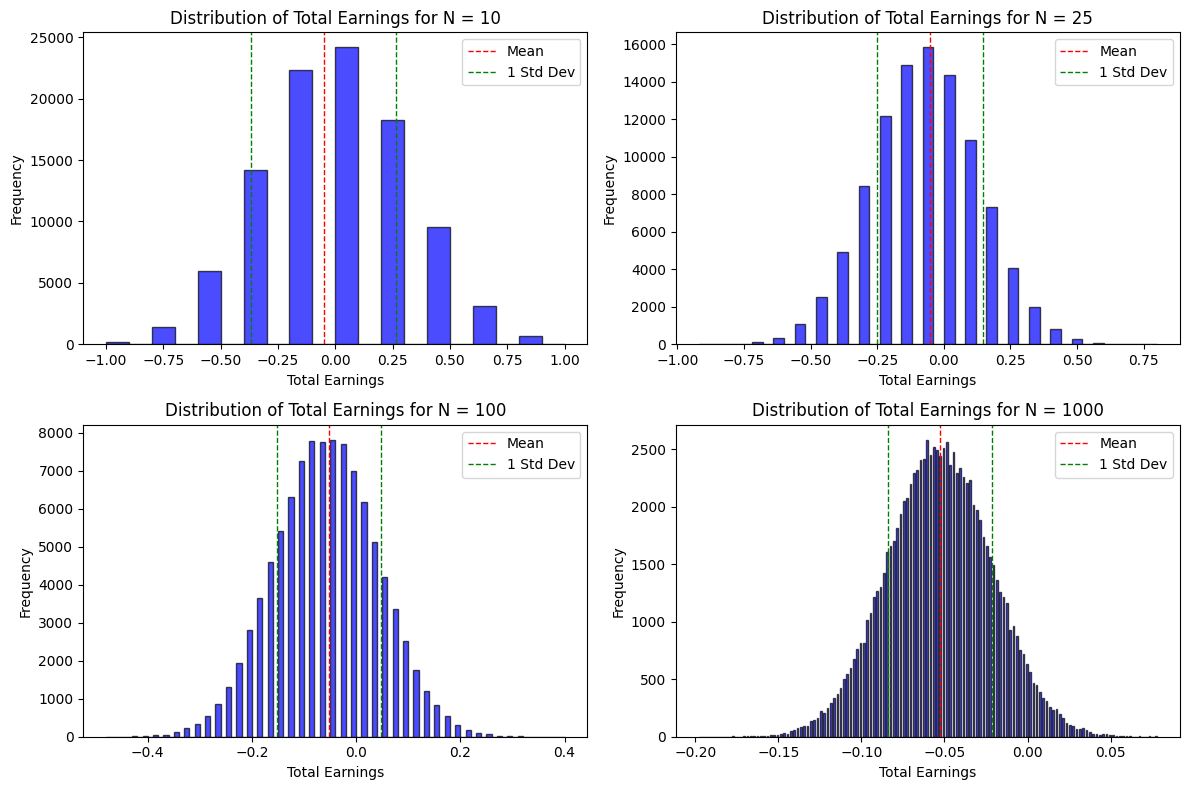

In [76]:
N_values = [10, 25, 100, 1000] #sample size
simulations = 100000

simulation_expected_values = {}
simulation_standard_errors = {}

plt.figure(figsize=(12, 8))

for N in (N_values):
    earnings = monte_carlo_simulation_average_wins(N, simulations)
    
    mean = np.mean(earnings)
    std_dev = np.std(earnings)
    min_val = np.min(earnings)
    max_val = np.max(earnings)
    print(f"N = {N}: simulation expected value = {mean}, simulation standard error = {std_dev}")

    simulation_expected_values[N] = mean
    simulation_standard_errors[N] = std_dev

    plt.subplot(2, 2, N_values.index(N)+1)
    bin_width = 1/N
    bins = np.arange(min_val, max_val + bin_width, bin_width)
    plt.hist(earnings, bins=bins, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of Total Earnings for N = {N}')
    plt.xlabel('Total Earnings')
    plt.ylabel('Frequency')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label='1 Std Dev')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1)
    plt.legend()

plt.tight_layout()
plt.show()

#### observe how the expected values and standard errors change with N.

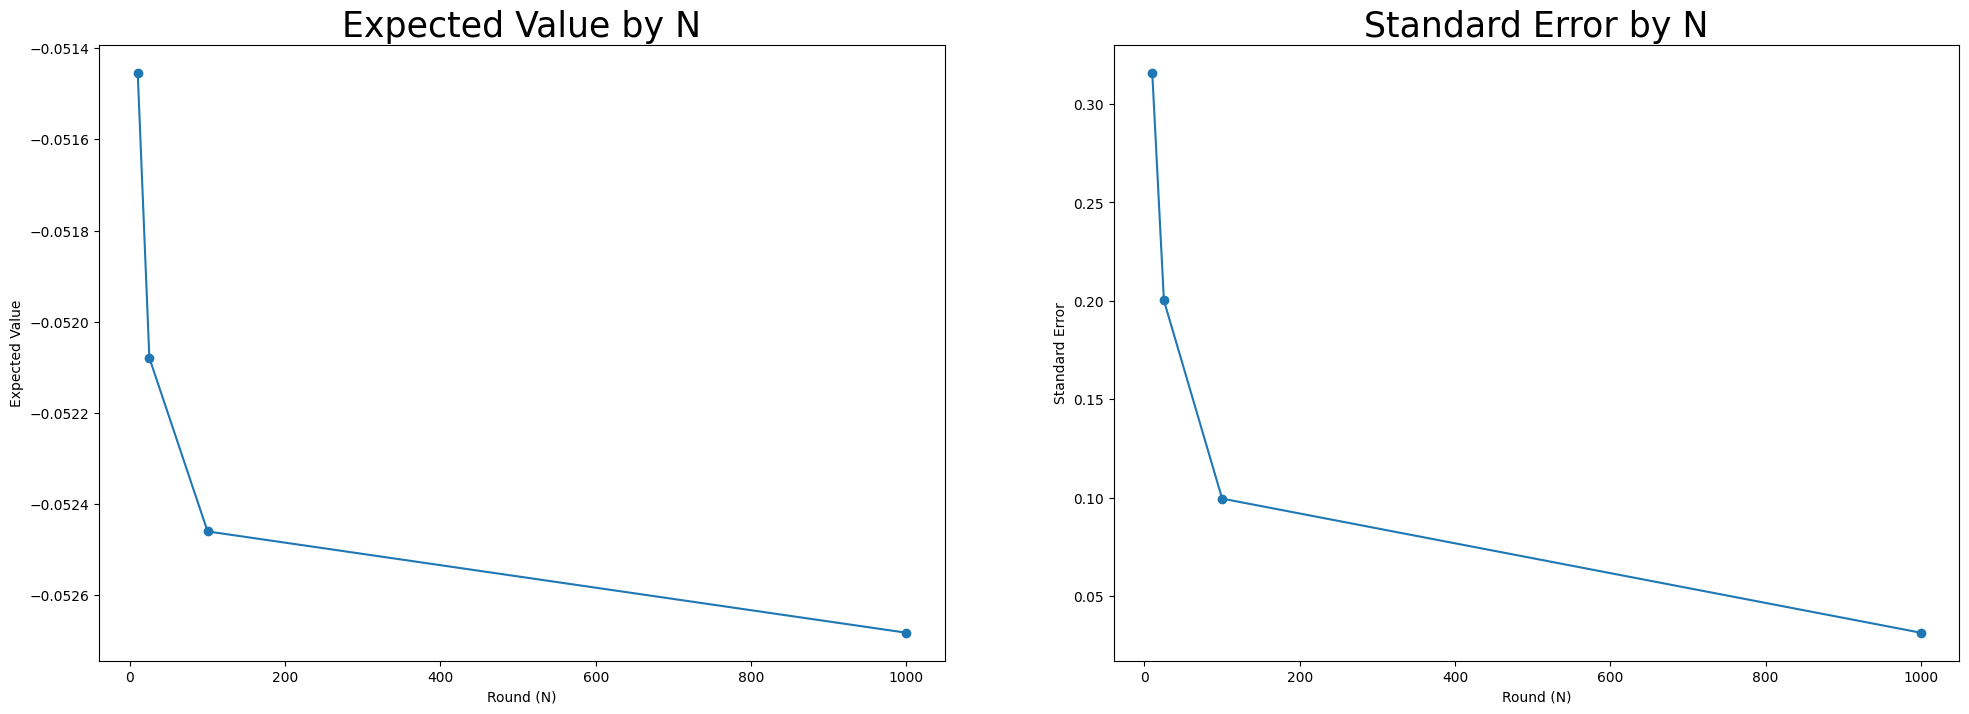

In [77]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 2, 1)
plt.plot(list(simulation_expected_values.keys()), list(simulation_expected_values.values()), linestyle='-', marker='o')

plt.title('Expected Value by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Expected Value')

plt.subplot(1, 2, 2)
plt.plot(list(simulation_standard_errors.keys()), list(simulation_standard_errors.values()), linestyle='-', marker='o')

plt.title('Standard Error by N', fontsize=25)
plt.xlabel('Round (N)')
plt.ylabel('Standard Error')

plt.show()

#### theoretical mean and standard errors for different values of N, for Sn / N:

X̄ = (X1 + X2 + X3 + ... + XN) / N

Mean of the sample mean (X̄):
E[X̄] = (N * μ) / N = μ

Standard deviation of the sample mean (Standard Error):
σ_X̄ = σ / sqrt(N)

#### Calculate the theoretical expected values and standard errors of 𝑆n/N for each N, and compare these theoretical values with your Monte Carlo simulation results. Report any differences between the theoretical and simulated values for each 𝑁.

In [78]:
import math

def calculate_mean_std_sample_X̄(N):
    theoretical_expected_value = population_mean
    theoretical_SE = population_std / math.sqrt(N)

    expected_value_difference = abs(theoretical_expected_value - simulation_expected_values.get(N))
    standard_error_difference = abs(theoretical_SE - simulation_standard_errors.get(N))
    
    print(f"for N = {N}: theoretical expected value : {theoretical_expected_value}, theoretical standard error: {theoretical_SE}")
    print(f"N = {N}: simulation expected value = {simulation_expected_values.get(N)}, simulation standard error = {simulation_standard_errors.get(N)}")
    print(f"N = {N}: expected value difference = {expected_value_difference}, standard error difference = {standard_error_difference}\n\n")

N_values = [10, 25, 100, 1000]

for N in N_values:
    calculate_mean_std_sample_X̄(N)

for N = 10: theoretical expected value : -0.05263157894736842, theoretical standard error: 0.3157894736842105
N = 10: simulation expected value = -0.051454, simulation standard error = 0.3158393355552788
N = 10: expected value difference = 0.0011775789473684184, standard error difference = 4.986187106831297e-05


for N = 25: theoretical expected value : -0.05263157894736842, theoretical standard error: 0.19972279958958186
N = 25: simulation expected value = -0.0520792, simulation standard error = 0.20022342751875963
N = 25: expected value difference = 0.000552378947368419, standard error difference = 0.000500627929177766


for N = 100: theoretical expected value : -0.05263157894736842, theoretical standard error: 0.09986139979479093
N = 100: simulation expected value = -0.05245980000000001, simulation standard error = 0.0995994647774776
N = 100: expected value difference = 0.00017177894736841032, standard error difference = 0.0002619350173133361


for N = 1000: theoretical expected val

### Q5. Use the Central Limit Theorem (CLT) to approximate the probability that the casino loses money when you play 𝑁 = 25 rounds, and verify this approximation using a Monte Carlo simulation.


### compute the probability using the normal distribution:
We need to find: P(Sn > 0) =1-P(Sn <= 0)

In [84]:
from scipy.stats import norm

def compute_probability_sn_greater_than_zero(mean_Sn, std_Sn):

    cdf_value = norm.cdf(0, loc=mean_Sn, scale=std_Sn)
    
    probability = 1 - cdf_value
    return probability

N = 25
mean_Sn = N * population_mean
std_Sn = math.sqrt(N) * population_std

casino_loses_money_probability_theoretical = compute_probability_sn_greater_than_zero(mean_Sn, std_Sn)

print(f"the theoretical fromula gives a probability of {casino_loses_money_probability_theoretical} that the casino loses money after 25 rounds.")

the theoretical fromula gives a probability of 0.3960736958979487 that the casino loses money after 25 rounds.


### Compute the Probability from the Simulation:

In [94]:
def monte_carlo_simulation_win_probabilty(N, simulations):
    number_of_wins = 0
    for _ in range(simulations):
        number_of_wins += (roulette_simulation(N) > 0)

    return number_of_wins / simulations

casino_loses_money_probability_simulation = monte_carlo_simulation_win_probabilty(25, 100000) 

print(f"the Monte Carlo simulation gives a probability of {casino_loses_money_probability_simulation} that the casino loses money after 25 rounds.")
print(f"the difference between theoretical and simulation is :{abs(casino_loses_money_probability_simulation - casino_loses_money_probability_theoretical)}")

the Monte Carlo simulation gives a probability of 0.39578 that the casino loses money after 25 rounds.
the difference between theoretical and simulation is :0.0002936958979486981


### Q6. Plot the probability that the casino loses money as a function of 𝑁 for values 𝑁 ranging from 25 to 1000. Discuss why casinos might encourage players to continue betting in light of these results.

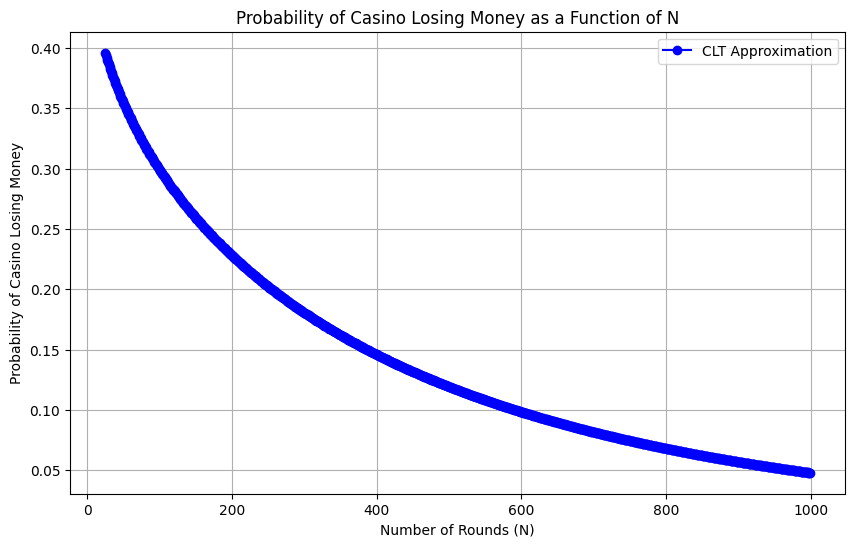

In [81]:
prob_casino_loss = []

N_values = np.arange(25, 1000) 

for N in N_values:
    mean_Sn = N * population_mean
    std_Sn = math.sqrt(N) * population_std

    prob_casino_loss.append(compute_probability_sn_greater_than_zero(mean_Sn, std_Sn))

plt.figure(figsize=(10, 6))
plt.plot(N_values, prob_casino_loss, marker='o', linestyle='-', color='b', label="CLT Approximation")
plt.xlabel("Number of Rounds (N)")
plt.ylabel("Probability of Casino Losing Money")
plt.title("Probability of Casino Losing Money as a Function of N")
plt.legend()
plt.grid(True)
plt.show()



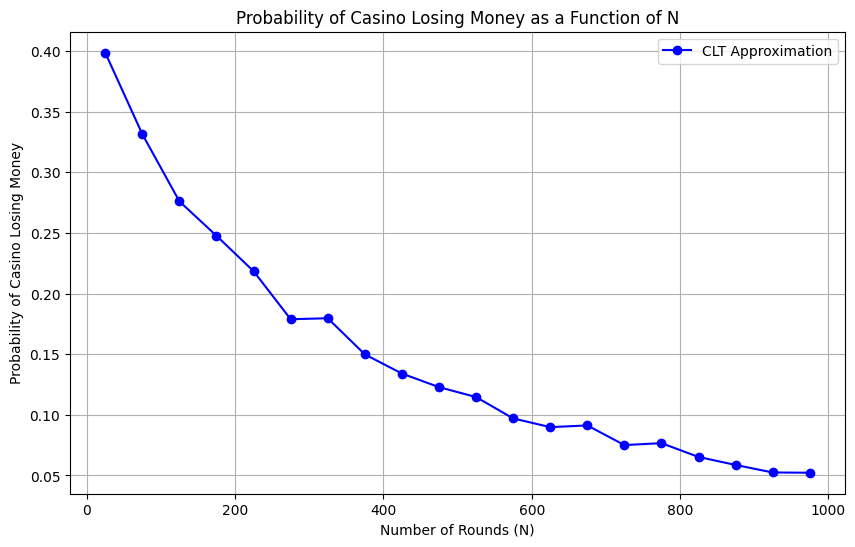

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


N_values = np.arange(25, 1000, 50) 

simulations = 5000

prob_casino_loss = []
for N in N_values:
    casino_loses_money_probability = monte_carlo_simulation_win_probabilty(N, simulations)
    prob_casino_loss.append(casino_loses_money_probability)

plt.figure(figsize=(10, 6))
plt.plot(N_values, prob_casino_loss, marker='o', linestyle='-', color='b', label="CLT Approximation")
plt.xlabel("Number of Rounds (N)")
plt.ylabel("Probability of Casino Losing Money")
plt.title("Probability of Casino Losing Money as a Function of N")
plt.legend()
plt.grid(True)
plt.show()
